# Pandas crash course


<img align="center" src="https://github.com/dfbarrero/dataCourse/raw/master/pandas/figs/pandas.png" width="300">



### Library imports

In [ ]:
import pandas as pd

In [ ]:
import numpy as np # Pandas and NumPy use to be together

## The Series object

In [ ]:
series = pd.Series([0.25, 0.5, 0.75, 1.0])

print(series)

In [ ]:
series[1:3]

In [ ]:
series = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

series

| Index       | Values |
|-----|-----------|
| 'a' | 0.25  | 
| 'b' | 0.5   | 
| 'c' | 0.75  | 
| 'c' | 1  | 

In [ ]:
series.values

In [ ]:
series.index

In [ ]:
series[0]

In [ ]:
series['a']

In [ ]:
series['a':'c']

In [ ]:
series[series>0.5]

In [ ]:
series[(series>0.5) & (series<1)]

## The DataFrame object

Data analysis heavily relies on *dataframes*.

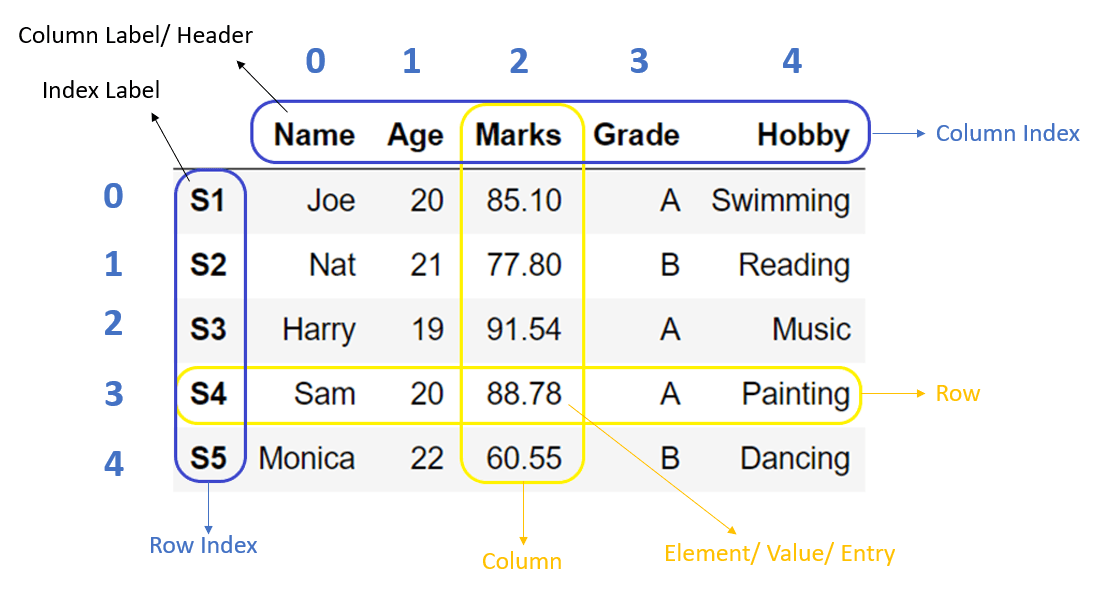

(Source: https://pynative.com/python-pandas-dataframe/)

In [ ]:
df = pd.DataFrame(np.random.rand(3,2), index=['a', 'b', 'c'], columns=['foo', 'bar'])

df

In [ ]:
df.values

In [ ]:
df.columns

In [ ]:
df.index

Indexing refers to columns

In [ ]:
df['foo']

Slicing refers to rows

In [ ]:
df['a':'b']

In [ ]:
df['b':]

Masking refers to rows

In [ ]:
df[df['foo'] > 0.5]

In [ ]:
df[df['foo'] < 0.5]

In [ ]:
print(df)

In [ ]:
display(df) # Only in notebooks

## Loading data

We're going to use the Titanic dataset.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [ ]:
?pd.read_csv

Reference documentation: [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
data.head()

Please, observe that the dataset only defines columns names.

Upload data to Colab (**It won't work anywhere else!**)

In [ ]:
# It only works in Google Colab!!!

from google.colab import files
uploaded = files.upload()

# To store dataset in a Pandas Dataframe
import io
df2 = pd.read_csv(io.BytesIO(uploaded['myfilename.csv']))

## Dataset summaries

In [ ]:
data.shape

In [ ]:
data.shape[0]

In [ ]:
data.shape[1]

In [ ]:
len(data) # Count rows

In [ ]:
data.info()

In [ ]:
data.dtypes

In [ ]:
data.describe()

In [ ]:
data.describe(include="all")

New concept: NaN (*not a number*)

In [ ]:
data['class'].value_counts()

In [ ]:
data['class'].nunique()

## Data selection by column

In [ ]:
data["fare"]

In [ ]:
data.fare

In [ ]:
data[["class", "sex", "fare"]]

## Data selection by row

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data[data['class'] == "First"];

In [ ]:
data[data['age'] < 30];

In [ ]:
data.drop_duplicates();

In [ ]:
data.nlargest(3, "age")

In [ ]:
data.nsmallest(3, "age")

In [ ]:
data[5, 5] # Error!

## loc, iloc and at indexers

**loc**: Explicit index (i.e., its label)

In [ ]:
data.loc[:, 'age':'fare'].head() # [row, column]

In [ ]:
data.loc[data['age'] < 10, ['class','sex']]

**iloc[]**: Implicit index (i.e., its numeric index)

In [ ]:
data.iloc[3] # Row number 3; one row, so the output changes

In [ ]:
data.iloc[[1, 5, 10]]

In [ ]:
data.iloc[1, 3]

In [ ]:
data.iloc[:, [1,2,6]].head() # Returns columns 1, 2 and 6

In [ ]:
data.iloc[5:10] 

*at[]* and *iat[]*: Selecting single elements from a DataFrame.

In [ ]:
data.at[1, "age"]

In [ ]:
data.iat[1, 6]

Complex queries.

In [ ]:
data[(data['age']>10) & (data['age']<15)]

In [ ]:
data.query("(age>10) and (age<15)")

## Missing data

In [ ]:
data.isna().sum()

Observe method chaining in the cell above.

In [ ]:
data['age'].isna().sum()

In [ ]:
data.notnull().sum()

Handling NaNs.

In [ ]:
display(data.head())

data.dropna().head()

In [ ]:
print(f"Rows: {len(data)}")
print(f"Rows: {len(data.dropna())}")

In [ ]:
cleanData = data.fillna("FILLED")

display(data['deck'].head())
display(cleanData['deck'].head())

In [ ]:
cleanData = data.fillna(0)

display(data['deck'].head())
display(cleanData['deck'].head())

## Making new columns

In [ ]:
data['relatives'] = data['sibsp'] + data['parch']

data[data['relatives'] > 1].head()

## Delete rows and columns

In [ ]:
clean = data.drop('relatives', axis=1); # Delete column

print(data.columns)
print(clean.columns)

Pandas use to return a new dataframe or view. This behaviour can be changed with the inplace parameter, as in the following cell:

In [ ]:
data.drop('relatives', axis=1, inplace=True); # Delete column in the same dataframe

print(data.columns)

In [ ]:
data.drop(['sibsp', 'parch'], axis=1); # Delete several columns

In [ ]:
data.drop([10,12,20], axis=0); # Delete several rows

## Combine dataset

In [ ]:
df1 = pd.DataFrame([{'A': 'A0', 'B': 'B0'}, {'A': 'A1', 'B': 'B1'}])
df2 = pd.DataFrame([{'A': 'A2', 'B': 'B2'}, {'A': 'A3', 'B': 'B3'}])

display(df1)
display(df2)

In [ ]:
pd.concat([df1, df2])

In [ ]:
pd.concat([df1, df2], axis=1)

### Renaming columns and indices

In [ ]:
display(df1)

df1.index = ["row1", "row2"]

display(df1)

In [ ]:
df1.columns = ["col1", "col2"]

df1

## Group data

In [ ]:
data.head()

In [ ]:
data.mean(numeric_only=True)

In [ ]:
data.groupby('class').mean()

<img align="center" src="https://github.com/dfbarrero/dataCourse/raw/master/pandas/figs/03.08-split-apply-combine.png" width="500">


In [ ]:
data.groupby("class").mean()['survived']

In [ ]:
data.groupby("class").describe()

In [ ]:
data.groupby("class").describe().T

In [ ]:
for (name, group) in data.groupby('class'):
    print("-----> " + name + " <-----")
    display(group)
    print("\n")

## Iterate over a dataframe

In [ ]:
for key in data.keys():
    print(key)

In [ ]:
for index, row in data.head(3).iterrows():
    print(index)
    print(row)

## Correlations

In [ ]:
data.corr()

## Plots

First we must prepare the graphical device.

In [ ]:
%matplotlib inline

We are ready to plot.

In [ ]:
data['fare'].hist()

In [ ]:
data.plot.scatter(x="age", y="fare")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True)

## Exercises

Perform some basic operations on the planets (i.e., exoplanets) toy dataset.

In [ ]:
import seaborn as sns

planets = sns.load_dataset('planets')

1.- Visualize your raw data.

2.- Identify the columns along with its datatype.

3.- Remove any column without interest.

4.- Obtain some summary statistics.

5.- Determine the number of NaNs that your dataset contains.

6.- Remove those rows with NaNs.

7.- Identify the exoplanets detection methods.

8.- Compute the number of planets detected by each method.

9.- Obtain the main statistics (mean, median, standard deviation, maximum and minimum) of the explanets grouped by detection method.

10.- Visualize an histogram of each variable of interest.

11.- For each detection method, visualize an histogram of any column of your interest. Do it placing one histogram in one cell, use as many cells as you need. Take a subset of your dataset in each cell. (Next week we will learn a more convenient way to do it).

12.- Visualize an scatterplot for each pair of attributes of interest. Place each plot in a different cell, using as many cells as you need.